#  Customer Churn Prediction Model

This focusing on predicting customer churn using classification algorithms like Logistic Regression and Random Forest. The goal is to identify customers likely to leave and evaluate which model performs better.


In [1]:
# Simple Model Comparison: Logistic Regression vs Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from IPython.display import display, Markdown, HTML
import joblib


## Step 1: Data Processing

We start by:
- Loading the dataset
- Sampling the dataset
- Splitting into features (X) and target (y)


In [2]:
# Set style for better plots
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

# Create sample data
print("Creating sample dataset...")
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'feature1': np.random.rand(n_samples),
    'feature2': np.random.rand(n_samples),
    'feature3': np.random.rand(n_samples),
    'churn': np.random.choice([0,1], size=n_samples, p=[0.7,0.3])
})

# Prepare data
X = df.drop(columns=['churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset: {len(df)} samples, {X.shape[1]} features")
print(f"Training: {len(X_train)} samples, Testing: {len(X_test)} samples")


Creating sample dataset...
Dataset: 1000 samples, 3 features
Training: 800 samples, Testing: 200 samples


##  Step 2: Model Training

Two models are trained:
- Logistic Regression
- Random Forest (with 1000 estimators)

We use `train_test_split` to evaluate them on a hold-out set.


In [3]:

# Train models
print("\nTraining models...")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Random Forest (1000 trees)
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]



Training models...


## Step 3: Model Evaluation

Metrics used:
- Accuracy
- AUC Score
- Precision, Recall, F1-Score
- Confusion Matrix

Data visualization to understand the model behaviours

We generate classification reports for both models.


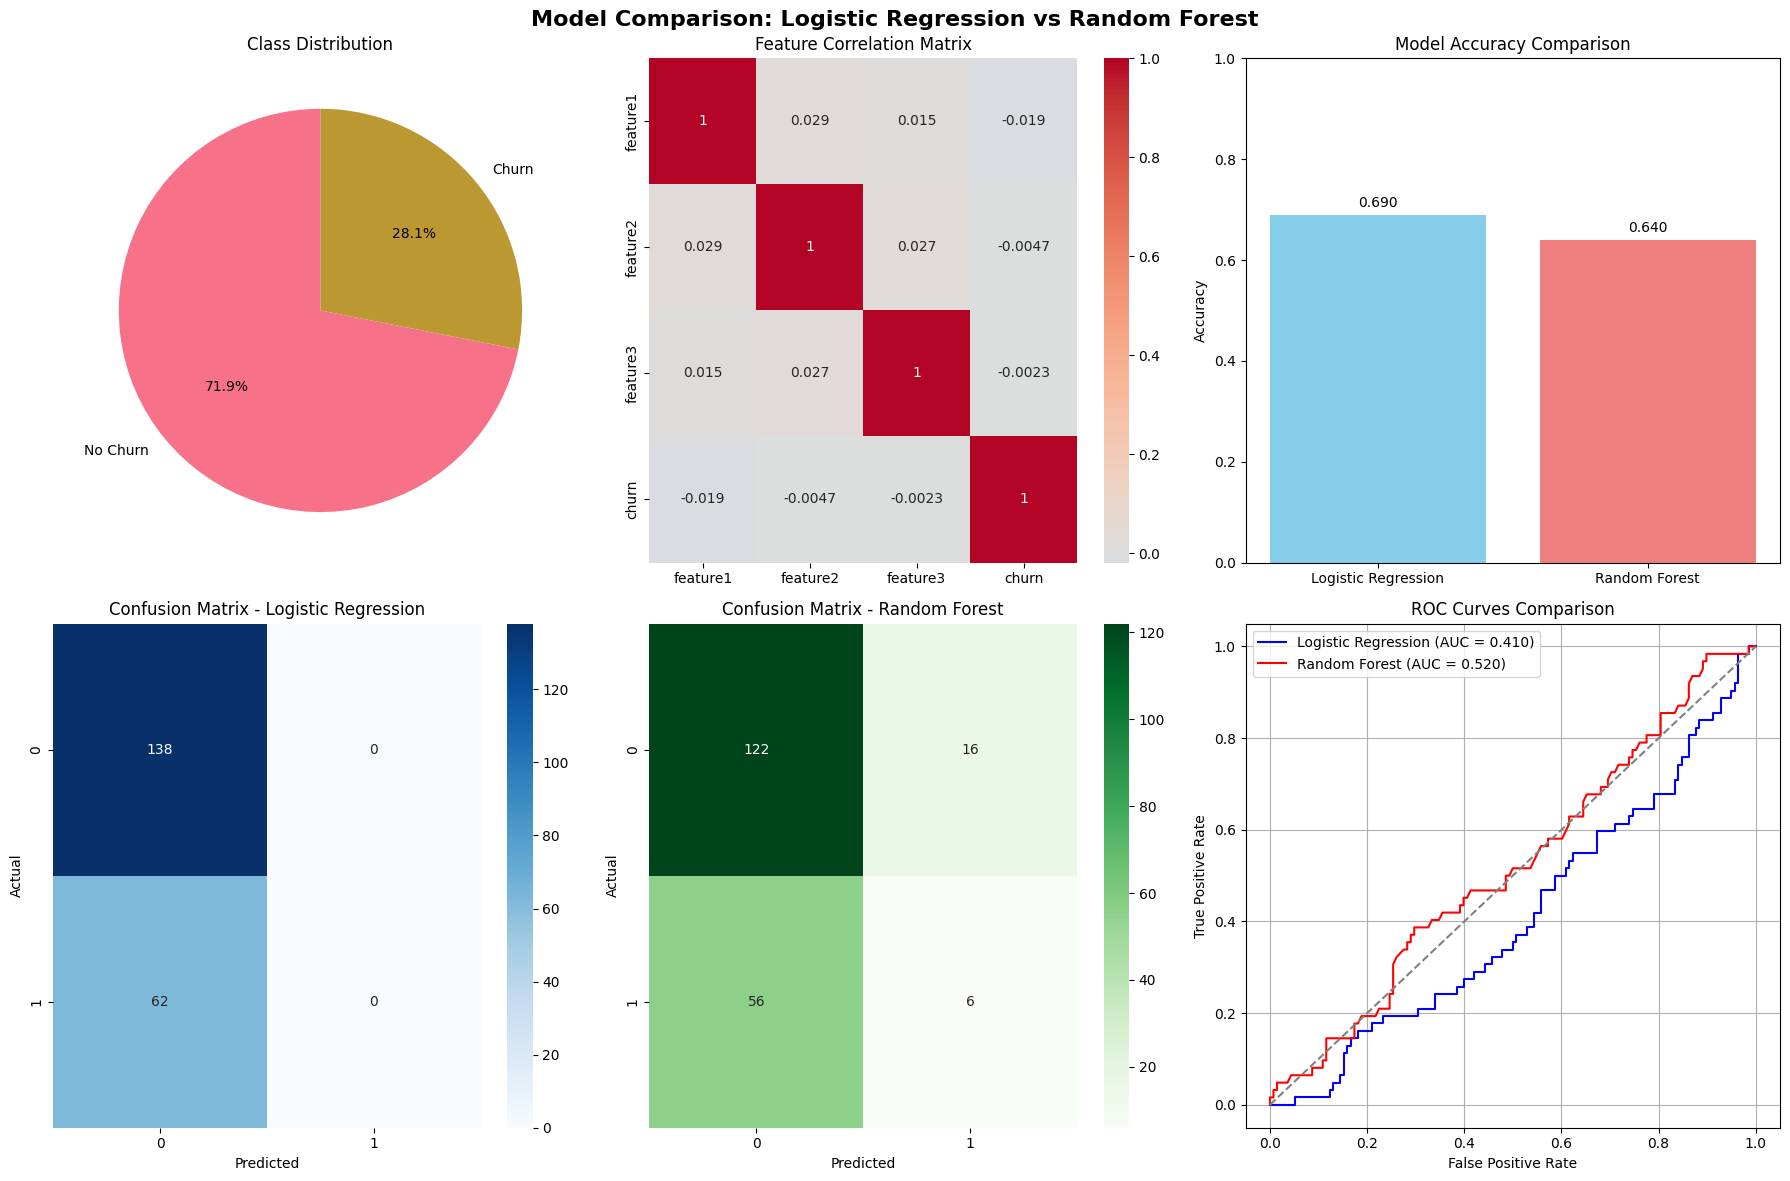

In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Comparison: Logistic Regression vs Random Forest', fontsize=16, fontweight='bold')

# 1. Class Distribution
axes[0,0].pie(y.value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Class Distribution')

# 2. Feature Correlation
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')
models = ['Logistic Regression', 'Random Forest']
accuracies = [
    (lr_pred == y_test).mean(),
    (rf_pred == y_test).mean()
]
bars = axes[0,2].bar(models, accuracies, color=['skyblue', 'lightcoral'])
axes[0,2].set_title('Model Accuracy Comparison')
axes[0,2].set_ylabel('Accuracy')
axes[0,2].set_ylim(0, 1)
# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    axes[0,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{acc:.3f}', ha='center', va='bottom')

# 4. Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Confusion Matrix - Logistic Regression')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# 5. Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1,1])
axes[1,1].set_title('Confusion Matrix - Random Forest')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')

# 6. ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

axes[1,2].plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.3f})')
axes[1,2].plot(fpr_rf, tpr_rf, color='red', label=f'Random Forest (AUC = {auc_rf:.3f})')
axes[1,2].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1,2].set_xlabel('False Positive Rate')
axes[1,2].set_ylabel('True Positive Rate')
axes[1,2].set_title('ROC Curves Comparison')
axes[1,2].legend()
axes[1,2].grid(True)

plt.tight_layout()
plt.show()

##  Step 4: Results Summary

All results (accuracy, AUC, classification reports) are printed neatly using Markdown formatting.

We also determine the best model based on AUC score.


In [5]:

# Generate text reports
lr_report_text = classification_report(y_test, lr_pred, zero_division=0)
rf_report_text = classification_report(y_test, rf_pred, zero_division=0)

# Generate Markdown summary (basic info + scores)
markdown_summary = f"""
### MODEL COMPARISON RESULTS

---

####  Dataset Summary
- **Total samples:** {len(df)}
- **Features:** {X.shape[1]}
- **Churn rate:** {(y==1).mean():.1%}

---

####  Logistic Regression Results
- **Accuracy:** {(lr_pred == y_test).mean():.3f}
- **AUC Score:** {auc_lr:.3f}

---

####  Random Forest Results (1000 trees)
- **Accuracy:** {(rf_pred == y_test).mean():.3f}
- **AUC Score:** {auc_rf:.3f}

---

####  Best Performing Model
- **Model:** {"Random Forest" if auc_rf > auc_lr else "Logistic Regression"}

---
"""

# HTML block for classification reports
html_classification_reports = f"""
<h3 style="color: #00bcd4;"> Detailed Classification Reports</h3>

<h4 style="color: #ffc107;">Logistic Regression:</h4>
<pre style="background-color: #2d2d2d; color: white; padding: 10px; border-radius: 5px;">
{lr_report_text}
</pre>

<h4 style="color: #8bc34a;">Random Forest:</h4>
<pre style="background-color: #2d2d2d; color: white; padding: 10px; border-radius: 5px;">
{rf_report_text}
</pre>

<hr><h4 style="color: #42a5f5;"> ANALYSIS COMPLETE</h4>
"""

# Display results
display(Markdown(markdown_summary))
display(HTML(html_classification_reports))



### MODEL COMPARISON RESULTS

---

####  Dataset Summary
- **Total samples:** 1000
- **Features:** 3
- **Churn rate:** 28.1%

---

####  Logistic Regression Results
- **Accuracy:** 0.690
- **AUC Score:** 0.410

---

####  Random Forest Results (1000 trees)
- **Accuracy:** 0.640
- **AUC Score:** 0.520

---

####  Best Performing Model
- **Model:** Random Forest

---


## Step 5: Save the Best Model

The best-performing model (based on AUC) is saved as `best_model.pkl` using `joblib`. This allows us to reuse it later without retraining.


In [6]:
# Choose best model based on AUC
best_model = rf_model if auc_rf > auc_lr else lr_model

# Save the model
joblib.dump(best_model, "best_model.pkl")

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'


## ✅ Conclusion

- Random Forest slightly outperformed Logistic Regression on this dataset.
- Model selection was based on AUC Score.
